In [435]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

In [436]:
df = pd.read_csv("~/Downloads/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [437]:
df.rename(columns = {'smv':'Standard minute Value', 'wip':'Work in Progress'}, inplace = True)
df

,date,quarter,department,day,team,targeted_productivity,Standard minute Value,Work in Progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [438]:
lst = []
for change in range(len(df['department'])):
    if df['department'][change] == 'sweing':
        lst.append("sewing")
    elif df['department'][change] == 'finishing ':
        lst.append('finishing')
    else:
        lst.append(df['department'][change])
df['department'] = lst

In [439]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
Standard minute Value      0
Work in Progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [440]:
df['Work in Progress'] = df['Work in Progress'].fillna(df['Work in Progress'].median())
df

,date,quarter,department,day,team,targeted_productivity,Standard minute Value,Work in Progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [441]:
df["over_time"]

0       7080
1        960
2       3660
3       3660
4       1920
        ... 
1192     960
1193     960
1194     960
1195    1800
1196     720
Name: over_time, Length: 1197, dtype: int64

In [442]:
#The BarPlot is showing the Relationship between quater and the actual productivity
#As seen in the plot, The Third Quater had the least actual productivity with 0.7 and the fifth quarter had the highest number of actual productivity with-
#About 0.84

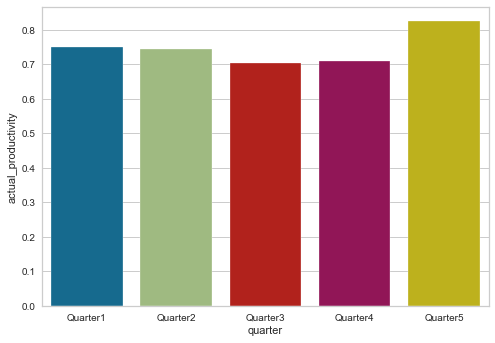

In [443]:
sns.barplot(x="quarter", y="actual_productivity", ci = None, data=df);

In [444]:
#The Barplot is showing the relationship between department and targeted productivity. 
#The finishing department had the highest number of targeted productivity 

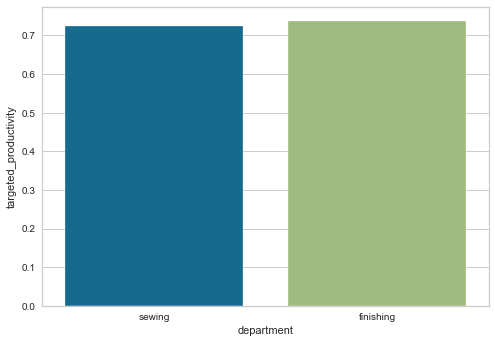

In [445]:
sns.barplot(x="department", y="targeted_productivity", ci = None, data=df);

In [446]:
#The Barplot is showing the relationship between department and actual productivity. 
#The finishing department had the highest number of actual productivity

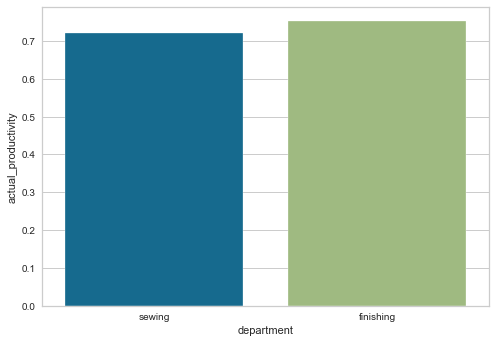

In [447]:
sns.barplot(x="department", y="actual_productivity", ci = None, data=df);

In [448]:
#The Barplot is showing the relationship between day and actual productivity. 
#Saturday has the highest number of actual productivity and Thursday has the lowest.

<AxesSubplot:xlabel='day', ylabel='actual_productivity'>

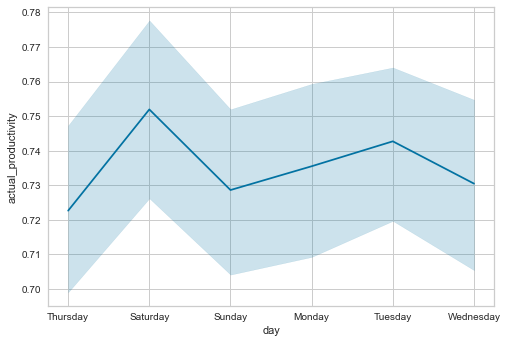

In [449]:
sns.lineplot(data=df, x="day", y="actual_productivity")

In [450]:
#The barplot is showing the relationship between department and targeted productivity.  
#The finishing department had the highest number for targeted productivity 

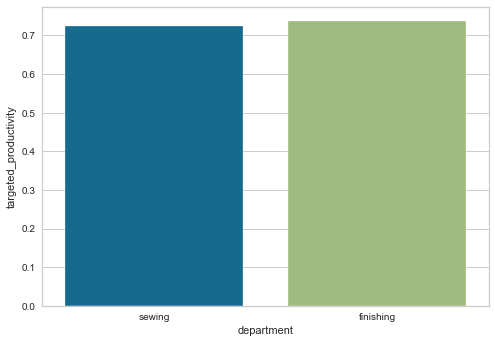

In [451]:
sns.barplot(x="department", y="targeted_productivity", ci = None, data=df);

In [452]:
#The barplot is showing the relationship between department and incentives.  
#The sewing department had the highest number of incentive 

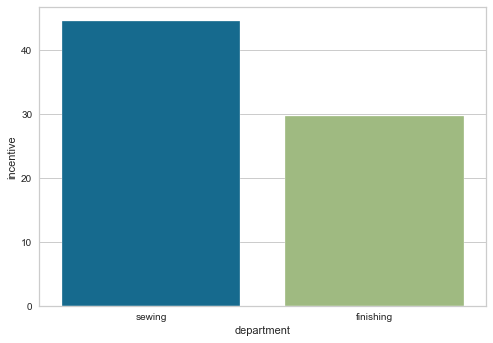

In [453]:
sns.barplot(x="department", y="incentive", ci = None, data=df);

In [454]:
#The barplot is showing the relationship between department and over time.  
#The workers in the sewing department do the most overtime

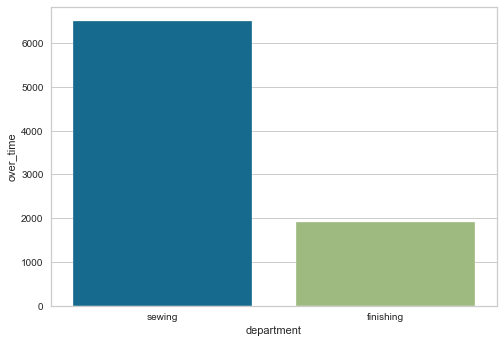

In [455]:
sns.barplot(x="department", y="over_time", ci = None, data=df);

In [456]:
#The barplot is showing the relationship between targeted productivity and actual productivity by each department.  
#It is shown that the workers in the finishing department exceeded their actual productivity

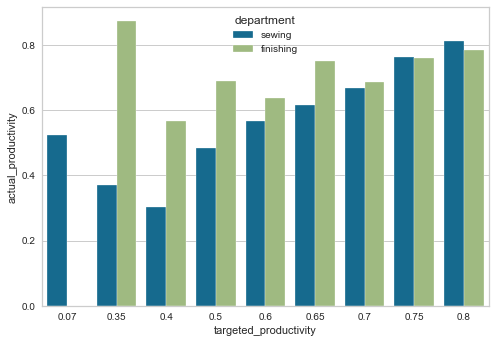

In [457]:
sns.barplot(x="targeted_productivity", y="actual_productivity", hue = "department", ci = None, data=df);

In [458]:
df.describe()

,team,targeted_productivity,Standard minute Value,Work in Progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [459]:
df["Work in Progress"] = np.where(df["Work in Progress"] < 970.00, 1039.00,  df["Work in Progress"])
df['Work in Progress'] = np.where(df['Work in Progress'] > 1083.00, 1030.00, df['Work in Progress'])

<AxesSubplot:>

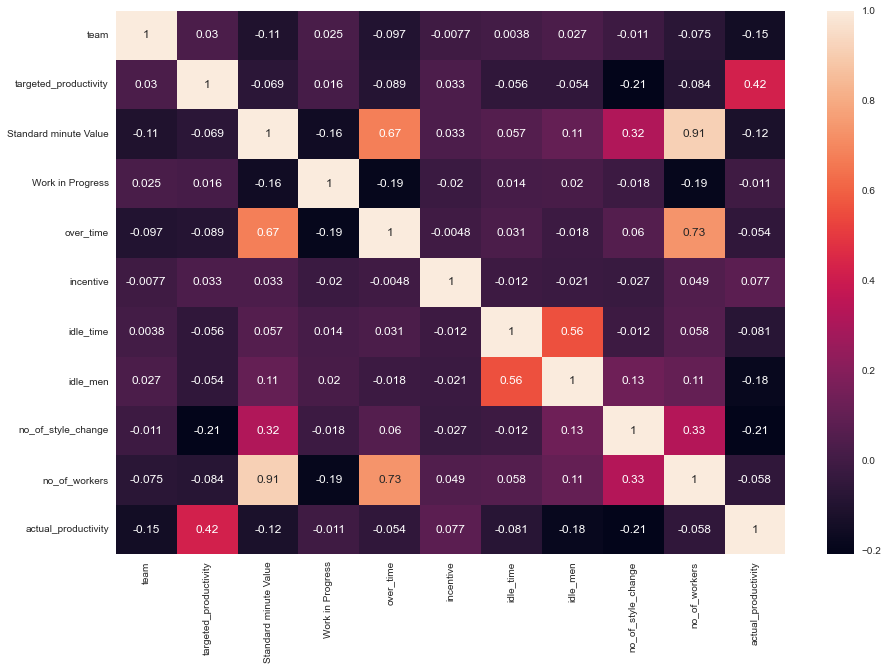

In [460]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [461]:
new_df=df.drop(['date', 'quarter', 'department', 'day', 'incentive', 'idle_time', 'no_of_style_change', 'no_of_workers', 'idle_men'], axis =1)
new_df

,team,targeted_productivity,Standard minute Value,Work in Progress,over_time,actual_productivity
0,8,0.80,26.16,1030.0,7080,0.940725
1,1,0.75,3.94,1039.0,960,0.886500
2,11,0.80,11.41,1039.0,3660,0.800570
3,12,0.80,11.41,1039.0,3660,0.800570
4,6,0.80,25.90,1030.0,1920,0.800382
...,...,...,...,...,...,...
1192,10,0.75,2.90,1039.0,960,0.628333
1193,8,0.70,3.90,1039.0,960,0.625625
1194,7,0.65,3.90,1039.0,960,0.625625
1195,9,0.75,2.90,1039.0,1800,0.505889


In [462]:
y = new_df['actual_productivity']
X = new_df.drop(columns=['actual_productivity'], axis=1)

X.shape

(1197, 5)

In [463]:
y.shape

(1197,)

In [464]:
X_train, X_test,  y_train, y_test= train_test_split(X, y, test_size = 0.20, random_state = 45, train_size = 0.80)

In [465]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=45)

In [466]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scale = MinMaxScaler() 
X_train_norm = pd.DataFrame(std_scale.fit_transform(X_train))

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_norm, y_train, test_size = .20, random_state = 45)

In [467]:
X_train_.shape

(765, 5)

In [468]:
y_train_.shape

(765,)

In [469]:
pca = PCA(n_components= 5)
model = pca.fit(X_train_)
PCA(n_components= 5)
print(model.explained_variance_ratio_)
print(model.singular_values_)           

[0.54122869 0.28062831 0.09658064 0.04290935 0.03865302]
[8.82934668 6.35775666 3.72977988 2.48607438 2.35955374]


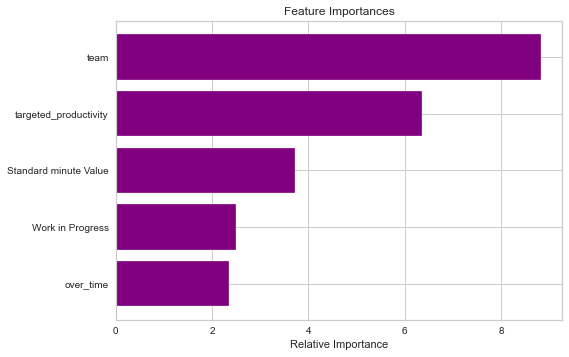

In [470]:
features = new_df.columns
importances = model.singular_values_
indices = np.argsort(importances)[-8:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

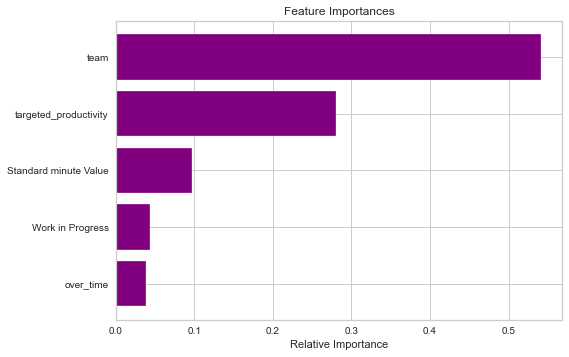

In [471]:
features = new_df.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-8:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [472]:
model = Ridge()
produc = model.fit(X_train_,  y_train_)
produc

Ridge()

In [473]:
coef_deter =produc.score(X_train_, y_train_)
coef_deter

0.23278926110019937

In [474]:
1 - (1-produc.score(X_train_, y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.22773517191113613

In [475]:
y_predict = produc.predict(X_test_)

In [476]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test_, y_predict))
print("MSE : ",mean_squared_error(y_test_, y_predict))
print("R2 score : ",r2_score(y_test_, y_predict))

MAE :  0.12175210841267543
MSE :  0.03028519811978538
R2 score :  0.17409467136161616


In [477]:
model_ = LinearRegression()
produc_ = model.fit(X_train_,  y_train_)
produc_

Ridge()

In [478]:
coef_deter_ =produc_.score(X_train_, y_train_)
coef_deter_

0.23278926110019937

In [479]:
1 - (1-produc_.score(X_train_, y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.22773517191113613

In [480]:
y_predict_ = produc_.predict(X_test_)

In [481]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test_, y_predict_))
print("MSE : ",mean_squared_error(y_test_, y_predict_))
print("R2 score:",r2_score(y_test_, y_predict_))

MAE :  0.12175210841267543
MSE :  0.03028519811978538
R2 score: 0.17409467136161616


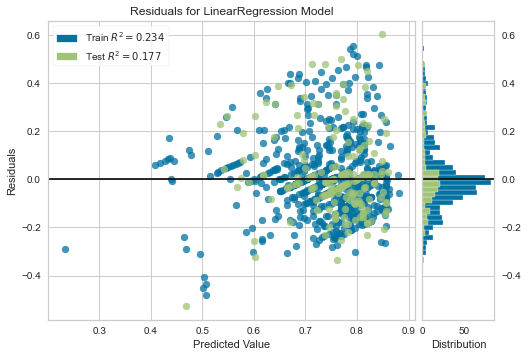

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [486]:
from yellowbrick.regressor import ResidualsPlot
model = LinearRegression()
visualizer = ResidualsPlot(model, hist=True, qqplot=False)

visualizer.fit(X_train_, y_train_)  
visualizer.score(X_test_, y_test_)  
visualizer.show()

In [487]:
#After Running Two Regression Models- Ridge and Linear Regression, The Linear Regression Model proved to be the best with Higher Accurancy(R2)-
#And Lower MAE and MSE Value